following along the https://pandas.pydata.org/docs/user_guide/10min.html

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Object creation

In [2]:
s = pd.Series([1,3,5, np.nan, 6, 7])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    7.0
dtype: float64

In [5]:
dates = pd.date_range("20200430" , periods=5)
dates

DatetimeIndex(['2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
               '2020-05-04'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df = pd.DataFrame(np.random.randn(5, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2020-04-30,0.625978,-0.138053,-0.563536,-0.318150
2020-05-01,-0.800190,0.503419,-1.421289,-1.652848
2020-05-02,-0.426766,-1.169766,-1.562839,0.543494
2020-05-03,-0.302119,0.021265,-1.249512,-0.861595
2020-05-04,-1.076262,1.365519,0.083690,-0.498830


In [29]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("23230101"),
        "C": pd.Series(1,index=list(range(4)), dtype="float32"),
        "D": np.array([3]*4, dtype="int32"),
        "E": pd.Categorical(['test','train','test', 'train']),
        "F": "foo",
    }
    ,index=[2,3,6,7]
)
df2

,A,B,C,D,E,F
2,1.0,2323-01-01,1.0,3,test,foo
3,1.0,2323-01-01,1.0,3,train,foo
6,1.0,2323-01-01,NaN,3,test,foo
7,1.0,2323-01-01,NaN,3,train,foo


Viewing data

In [19]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [ ]:
# df2.A                  df2.bool
# df2.abs                df2.boxplot
# df2.add                df2.C
# df2.add_prefix         df2.clip
# df2.add_suffix         df2.columns
# df2.align              df2.copy
# df2.all                df2.count
# df2.any                df2.combine
# df2.append             df2.D
# df2.apply              df2.describe
# df2.applymap           df2.diff
# df2.B                  df2.duplicated

In [26]:
df.tail(3)

,A,B,C,D
2020-05-02,-0.426766,-1.169766,-1.562839,0.543494
2020-05-03,-0.302119,0.021265,-1.249512,-0.861595
2020-05-04,-1.076262,1.365519,0.083690,-0.498830


In [27]:
df.index

DatetimeIndex(['2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
               '2020-05-04'],
              dtype='datetime64[ns]', freq='D')

In [30]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [34]:
df.to_numpy()

array([[ 0.62597769, -0.13805288, -0.56353602, -0.31815019],
       [-0.80019009,  0.50341851, -1.42128918, -1.65284799],
       [-0.42676616, -1.16976605, -1.56283891,  0.54349359],
       [-0.30211898,  0.02126507, -1.24951199, -0.86159476],
       [-1.07626184,  1.36551921,  0.08369004, -0.49882964]])

In [35]:
df2.to_numpy()

array([[1.0, Timestamp('2323-01-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2323-01-01 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2323-01-01 00:00:00'), nan, 3, 'test', 'foo'],
       [1.0, Timestamp('2323-01-01 00:00:00'), nan, 3, 'train', 'foo']],
      dtype=object)

In [36]:
df.describe()

,A,B,C,D
count,5.000000,5.000000,5.000000,5.000000
mean,-0.395872,0.116477,-0.942697,-0.557586
std,0.648137,0.927106,0.690108,0.800809
min,-1.076262,-1.169766,-1.562839,-1.652848
25%,-0.800190,-0.138053,-1.421289,-0.861595
50%,-0.426766,0.021265,-1.249512,-0.498830
75%,-0.302119,0.503419,-0.563536,-0.318150
max,0.625978,1.365519,0.083690,0.543494


In [37]:
df.T

,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04
A,0.625978,-0.800190,-0.426766,-0.302119,-1.076262
B,-0.138053,0.503419,-1.169766,0.021265,1.365519
C,-0.563536,-1.421289,-1.562839,-1.249512,0.083690
D,-0.318150,-1.652848,0.543494,-0.861595,-0.498830


In [51]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2020-05-04,-1.076262,1.365519,0.083690,-0.498830
2020-05-03,-0.302119,0.021265,-1.249512,-0.861595
2020-05-02,-0.426766,-1.169766,-1.562839,0.543494
2020-05-01,-0.800190,0.503419,-1.421289,-1.652848
2020-04-30,0.625978,-0.138053,-0.563536,-0.318150


In [48]:
df.sort_values(by="B")

,A,B,C,D
2020-05-02,-0.426766,-1.169766,-1.562839,0.543494
2020-04-30,0.625978,-0.138053,-0.563536,-0.318150
2020-05-03,-0.302119,0.021265,-1.249512,-0.861595
2020-05-01,-0.800190,0.503419,-1.421289,-1.652848
2020-05-04,-1.076262,1.365519,0.083690,-0.498830


**Selection**

Getitem 

In [52]:
df["A"]

2020-04-30    0.625978
2020-05-01   -0.800190
2020-05-02   -0.426766
2020-05-03   -0.302119
2020-05-04   -1.076262
Freq: D, Name: A, dtype: float64

In [53]:
df[0:3]

,A,B,C,D
2020-04-30,0.625978,-0.138053,-0.563536,-0.318150
2020-05-01,-0.800190,0.503419,-1.421289,-1.652848
2020-05-02,-0.426766,-1.169766,-1.562839,0.543494


Selection by label

In [54]:
df["20200501":"20200503"]

,A,B,C,D
2020-05-01,-0.800190,0.503419,-1.421289,-1.652848
2020-05-02,-0.426766,-1.169766,-1.562839,0.543494
2020-05-03,-0.302119,0.021265,-1.249512,-0.861595


In [55]:
df.T["B":"D"]

,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04
B,-0.138053,0.503419,-1.169766,0.021265,1.365519
C,-0.563536,-1.421289,-1.562839,-1.249512,0.083690
D,-0.318150,-1.652848,0.543494,-0.861595,-0.498830


In [56]:
df.loc[dates[0],"A"]

np.float64(0.6259776870896994)

Selection by position

In [57]:
df.iloc[3]

A   -0.302119
B    0.021265
C   -1.249512
D   -0.861595
Name: 2020-05-03 00:00:00, dtype: float64

In [58]:
df.iloc[3:5,0:2]

,A,B
2020-05-03,-0.302119,0.021265
2020-05-04,-1.076262,1.365519


In [59]:
df.iloc[[1,2,4],[0,2]]

,A,C
2020-05-01,-0.800190,-1.421289
2020-05-02,-0.426766,-1.562839
2020-05-04,-1.076262,0.083690


Boolean indexing


In [ ]:
df[df.A >0] # df[df["A"] > 0 ] # df[df.iloc["A"] > 0]

,A,B,C,D
2020-04-30,0.625978,-0.138053,-0.563536,-0.31815


In [70]:
df.iloc[:, (df.iloc[0] > 0).to_numpy()]


,A
2020-04-30,0.625978
2020-05-01,-0.800190
2020-05-02,-0.426766
2020-05-03,-0.302119
2020-05-04,-1.076262


In [71]:
df[df>0]

,A,B,C,D
2020-04-30,0.625978,NaN,NaN,NaN
2020-05-01,NaN,0.503419,NaN,NaN
2020-05-02,NaN,NaN,NaN,0.543494
2020-05-03,NaN,0.021265,NaN,NaN
2020-05-04,NaN,1.365519,0.08369,NaN


In [74]:
df2 = df.copy()
df2['E'] = ["one", "one", "two", "one", "five"]
df2

,A,B,C,D,E
2020-04-30,0.625978,-0.138053,-0.563536,-0.318150,one
2020-05-01,-0.800190,0.503419,-1.421289,-1.652848,one
2020-05-02,-0.426766,-1.169766,-1.562839,0.543494,two
2020-05-03,-0.302119,0.021265,-1.249512,-0.861595,one
2020-05-04,-1.076262,1.365519,0.083690,-0.498830,five


In [77]:
df2[df2['E'].isin(['one', 'two'])]

,A,B,C,D,E
2020-04-30,0.625978,-0.138053,-0.563536,-0.318150,one
2020-05-01,-0.800190,0.503419,-1.421289,-1.652848,one
2020-05-02,-0.426766,-1.169766,-1.562839,0.543494,two
2020-05-03,-0.302119,0.021265,-1.249512,-0.861595,one


In [79]:
df2['E'].isin(['one', 'two']).to_numpy()

array([ True,  True,  True,  True, False])

Setting

In [86]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range("2020-04-30", periods=6))
s1

2020-04-30    1
2020-05-01    2
2020-05-02    3
2020-05-03    4
2020-05-04    5
2020-05-05    6
Freq: D, dtype: int64

In [87]:
df['F'] = s1
df

,A,B,C,D,F
2020-04-30,0.625978,-0.138053,-0.563536,-0.318150,1
2020-05-01,-0.800190,0.503419,-1.421289,-1.652848,2
2020-05-02,-0.426766,-1.169766,-1.562839,0.543494,3
2020-05-03,-0.302119,0.021265,-1.249512,-0.861595,4
2020-05-04,-1.076262,1.365519,0.083690,-0.498830,5


In [89]:
df.at[dates[0], "A"] = 0
df.iat[1,1] = 1
df.loc[:,'D'] = np.array([5]* len(df))
df

,A,B,C,D,F
2020-04-30,0.000000,-0.138053,-0.563536,5.0,1
2020-05-01,-0.800190,1.000000,-1.421289,5.0,2
2020-05-02,-0.426766,-1.169766,-1.562839,5.0,3
2020-05-03,-0.302119,0.021265,-1.249512,5.0,4
2020-05-04,-1.076262,1.365519,0.083690,5.0,5


In [ ]:
df2 = df.copy()
df2[df2 < 0] += 10
df2

,A,B,C,D,F
2020-04-30,0.000000,9.861947,9.436464,5.0,1
2020-05-01,9.199810,1.000000,8.578711,5.0,2
2020-05-02,9.573234,8.830234,8.437161,5.0,3
2020-05-03,9.697881,0.021265,8.750488,5.0,4
2020-05-04,8.923738,1.365519,0.083690,5.0,5


Missing data

In [98]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)[::-1] + ["E"])
df1.dropna(how="any")

,F,D,C,B,A,E


In [99]:
df1.fillna(value=5)

,F,D,C,B,A,E
2020-04-30,1,5.0,-0.563536,-0.138053,0.000000,5.0
2020-05-01,2,5.0,-1.421289,1.000000,-0.800190,5.0
2020-05-02,3,5.0,-1.562839,-1.169766,-0.426766,5.0
2020-05-03,4,5.0,-1.249512,0.021265,-0.302119,5.0


In [101]:
pd.isna(df1)

,F,D,C,B,A,E
2020-04-30,False,False,False,False,False,True
2020-05-01,False,False,False,False,False,True
2020-05-02,False,False,False,False,False,True
2020-05-03,False,False,False,False,False,True


Operations

In [102]:
df.mean()

A   -0.521067
B    0.215793
C   -0.942697
D    5.000000
F    3.000000
dtype: float64

In [103]:
df.mean(axis=1)

2020-04-30    1.059682
2020-05-01    1.155704
2020-05-02    0.968126
2020-05-03    1.493927
2020-05-04    2.074589
Freq: D, dtype: float64

In [105]:
s = pd.Series([1,2,3,np.nan, 6],index=dates).shift(2)
s

2020-04-30    NaN
2020-05-01    NaN
2020-05-02    1.0
2020-05-03    2.0
2020-05-04    3.0
Freq: D, dtype: float64

In [112]:
df.sub(s,axis=0)

,A,B,C,D,F
2020-04-30,NaN,NaN,NaN,NaN,NaN
2020-05-01,NaN,NaN,NaN,NaN,NaN
2020-05-02,-1.426766,-2.169766,-2.562839,4.0,2.0
2020-05-03,-2.302119,-1.978735,-3.249512,3.0,2.0
2020-05-04,-4.076262,-1.634481,-2.916310,2.0,2.0


In [117]:
df.agg(lambda x: np.mean(x)*5.6 , axis=1)

2020-04-30     5.934220
2020-05-01     6.471943
2020-05-02     5.421504
2020-05-03     8.365990
2020-05-04    11.617701
Freq: D, dtype: float64

In [119]:
df.transform(lambda x: x*101.2 )

,A,B,C,D,F
2020-04-30,0.000000,-13.970951,-57.029845,506.0,101.2
2020-05-01,-80.979237,101.200000,-143.834465,506.0,202.4
2020-05-02,-43.188736,-118.380325,-158.159297,506.0,303.6
2020-05-03,-30.574441,2.152025,-126.450614,506.0,404.8
2020-05-04,-108.917698,138.190544,8.469433,506.0,506.0


In [120]:
s = pd.Series(np.random.randint(0,7,size =10))
s

0    4
1    1
2    1
3    3
4    5
5    2
6    5
7    6
8    4
9    0
dtype: int32

In [121]:
s.value_counts()

4    2
1    2
5    2
3    1
2    1
6    1
0    1
Name: count, dtype: int64

In [125]:
s = pd.Series(["A", "B", "C", "Aaba", np.nan, "can", np.nan, "dOg"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4     NaN
5     can
6     NaN
7     dog
dtype: object

Merge

In [126]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-1.267738,-0.136764,-0.600897,0.620508
1,0.730804,0.927617,2.046268,-1.106862
2,-1.529449,-0.282881,-1.779664,-0.622743
3,-0.805277,-1.174986,-1.542212,0.665634
4,-0.036272,1.391697,0.128898,-0.394325
5,1.067869,0.463994,1.185640,-0.373259
6,0.472588,-0.402024,0.355065,1.035550
7,0.522887,0.950639,1.032860,0.979972
8,0.507248,-1.911780,-0.857489,-1.590534
9,-0.878112,1.926294,-0.763152,-0.244112


In [129]:
pieces = [df[:3], df[3:7], df[7:10]]
pd.concat(pieces) 

,0,1,2,3
0,-1.267738,-0.136764,-0.600897,0.620508
1,0.730804,0.927617,2.046268,-1.106862
2,-1.529449,-0.282881,-1.779664,-0.622743
3,-0.805277,-1.174986,-1.542212,0.665634
4,-0.036272,1.391697,0.128898,-0.394325
5,1.067869,0.463994,1.185640,-0.373259
6,0.472588,-0.402024,0.355065,1.035550
7,0.522887,0.950639,1.032860,0.979972
8,0.507248,-1.911780,-0.857489,-1.590534
9,-0.878112,1.926294,-0.763152,-0.244112


In [140]:
left = pd.DataFrame({"key": ["foo", "foo","potato"], "lval": [1, 2, 3]})
right = pd.DataFrame({"key": ["foo", "potato", "potato"], "rval": [4, 5, 12]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,2,4
2,potato,3,5
3,potato,3,12


Grouping

In [6]:
siz = 10
df = pd.DataFrame(
    {
        "A" : [np.random.choice(['foo', 'bar']) for x in range(siz)],
        "B" : [np.random.choice(["one", "two","three"]) for x in range(siz)],
        "C" : np.random.randint(0,100,size=siz),
        "D" : np.random.randint(0,100,size=siz)
    }
)
df

,A,B,C,D
0,foo,three,16,80
1,foo,two,5,29
2,foo,two,35,91
3,bar,three,16,26
4,foo,two,5,7
5,foo,two,57,18
6,bar,one,85,85
7,foo,two,54,97
8,foo,two,11,90
9,bar,two,18,52


In [7]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,119,163
foo,183,412


In [8]:
df.groupby(["A","B"]).sum()

C    D
A   B              
bar one     85   85
    three   16   26
    two     18   52
foo three   16   80
    two    167  332

Reshaping

In [24]:
arrays = [
    np.repeat(["bar", "baz", "foo", "qux"],2),
    np.tile(["one", "two"], 4),
]

index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.074192  0.940024
      two    -0.879779 -0.658322
baz   one     0.404882 -0.351557
      two     1.046454 -1.669996

In [25]:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A   -0.074192
               B    0.940024
       two     A   -0.879779
               B   -0.658322
baz    one     A    0.404882
               B   -0.351557
       two     A    1.046454
               B   -1.669996
dtype: float64

In [26]:
stacked.unstack()

A         B
first second                    
bar   one    -0.074192  0.940024
      two    -0.879779 -0.658322
baz   one     0.404882 -0.351557
      two     1.046454 -1.669996

In [27]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.074192 -0.879779
      B  0.940024 -0.658322
baz   A  0.404882  1.046454
      B -0.351557 -1.669996

In [28]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.074192  0.404882
       B  0.940024 -0.351557
two    A -0.879779  1.046454
       B -0.658322 -1.669996

Time Series


In [38]:
rng = pd.date_range("1/1/2016", periods=500, freq='s')
ts = pd.Series(np.random.randint(1,15, len(rng)), index=rng)
ts.resample('123s').sum()

2016-01-01 00:00:00    966
2016-01-01 00:02:03    952
2016-01-01 00:04:06    935
2016-01-01 00:06:09    907
2016-01-01 00:08:12     58
Freq: 123s, dtype: int32

In [ ]:
rng = pd.date_range('2013/3/12 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randint(1,12,len(rng)), rng)

ts

2013-03-12    6
2013-03-13    7
2013-03-14    8
2013-03-15    1
2013-03-16    8
Freq: D, dtype: int32

In [43]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2013-03-12 00:00:00+00:00    6
2013-03-13 00:00:00+00:00    7
2013-03-14 00:00:00+00:00    8
2013-03-15 00:00:00+00:00    1
2013-03-16 00:00:00+00:00    8
Freq: D, dtype: int32

In [45]:
ts_utc.tz_convert("US/Eastern")

2013-03-11 20:00:00-04:00    6
2013-03-12 20:00:00-04:00    7
2013-03-13 20:00:00-04:00    8
2013-03-14 20:00:00-04:00    1
2013-03-15 20:00:00-04:00    8
Freq: D, dtype: int32

In [46]:
rng

DatetimeIndex(['2013-03-12', '2013-03-13', '2013-03-14', '2013-03-15',
               '2013-03-16'],
              dtype='datetime64[ns]', freq='D')

In [47]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2013-03-19', '2013-03-20', '2013-03-21', '2013-03-22',
               '2013-03-22'],
              dtype='datetime64[ns]', freq=None)

Categoricals

In [55]:
df = pd.DataFrame(
    {
        "id" : range(1,7),
        "raw_grade" : np.random.choice(["a", 'b', 'c'], 6)
    }
)
df

,id,raw_grade
0,1,c
1,2,a
2,3,b
3,4,c
4,5,c
5,6,b


In [66]:

df["grade"] =df["raw_grade"].astype("category")
df['grade']

0    c
1    a
2    b
3    c
4    c
5    b
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'c']

In [67]:
new_categories =  ["very good", "good", "very bad"]
df["grade"] = df['grade'].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,c,very bad
1,2,a,very good
2,3,b,good
3,4,c,very bad
4,5,c,very bad
5,6,b,good


In [68]:
df["grade"] = df['grade'].cat.set_categories(
    ["very bad", "bad", "mid", "good", "very good"]
)
df

,id,raw_grade,grade
0,1,c,very bad
1,2,a,very good
2,3,b,good
3,4,c,very bad
4,5,c,very bad
5,6,b,good


In [76]:
df.groupby("grade",observed=True).size()

grade
very bad     3
good         2
very good    1
dtype: int64

Plotting

<Axes: >

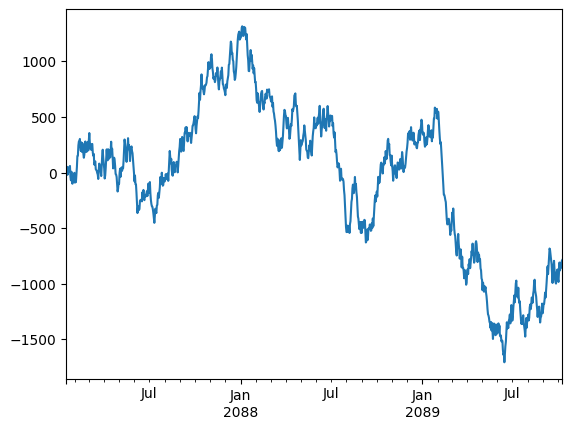

In [85]:
plt.close("all")
ts = pd.Series(np.random.randint(-100,100,1000), pd.date_range("2087/1/15", periods=1000)).cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

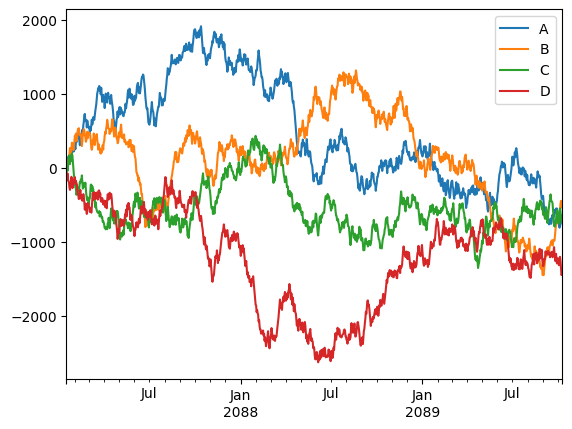

In [106]:
df = pd.DataFrame(
    np.random.randint(-100,100, 4000).reshape(1000,4) ,index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()

plt.figure();
df.plot()
plt.legend(loc='best')